<a href="https://colab.research.google.com/github/G-Shillcock/Division_of_Labour/blob/main/DoLgraphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

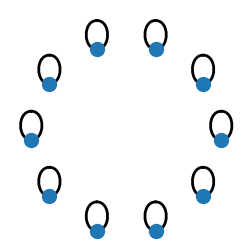

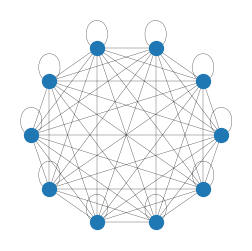

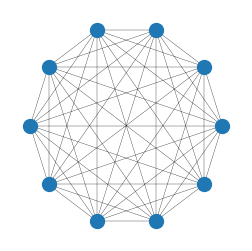

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def draw(λ):
    n = 10

    adj = (λ*np.ones(n) + (1-2*λ)*np.eye(n))/(n*(n*λ-2*λ+1))

    G = nx.Graph(adj)
    layout = nx.circular_layout(G, scale=.5)

    plt.figure(figsize=(3,3))
    plt.axis('off')

    for edge in G.edges(data=True):
        alpha = 1 # n*edge[2]['weight']
        width = 2*n*edge[2]['weight']
        nx.draw_networkx_edges(G, layout, edgelist=[(edge[0], edge[1])], alpha=alpha, width=width)

    nx.draw_networkx_nodes(G, layout, node_size=100)

    plt.savefig(f'graph{λ}.svg')
    plt.show()

for λ in np.linspace(0, 1, 3):
    draw(λ)

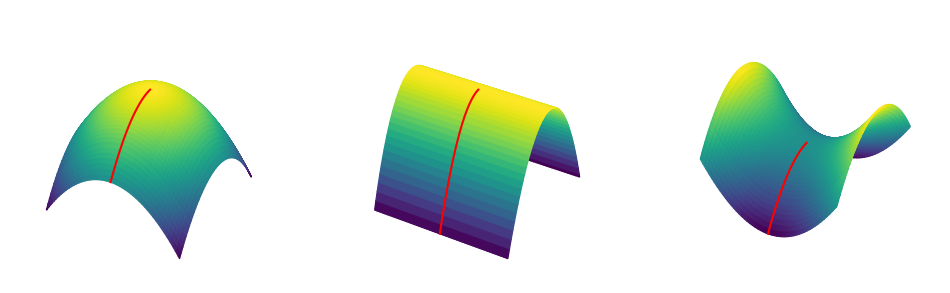

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function for a saddle point
def saddle_point(x, y, c):
    return (x-1)**2 - (y-1)**2 - c*(x-1)**2

x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(1,3,subplot_kw={'projection':'3d'}, figsize=(12,8))

c = 2
for ax in axes:
    ax.view_init(elev=35, azim=-60)
    surf = ax.plot_surface(x, y, saddle_point(x, y, c), shade=False, cmap='viridis')
    surf.set_edgecolors(surf.to_rgba(surf._A))
    surf.set_facecolors("white")

    x_line = np.ones_like(y)[:len(y)//2, 0]
    ax.plot(x_line, y[:len(y)//2, 0], saddle_point(x_line, y[:len(y)//2, 0], c), color='red',zorder=4)
    ax.axis('off')
    c -= 1
